# Heart Attack prediction UCI

## Step 1 : Importing all the libraries

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Step 2 : Loading the dataset


#### we can also download the data set from : https://www.kaggle.com/ronitf/heart-disease-uci


=============================================

The diagnosis of heart disease is done on a combination of clinical signs and test results. The importance of a correct early diagnosis is primordial to provide care and avoid casualties. Examples of types of tests to understand if a patient is suffering or at risk of a heart attack are: electrocardiograms, cardiac computerized tomography (CT) scans, blood tests and exercise stress tests. Also, the literature cites risk factors for heart attacks as high cholesterol, high blood pressure, diabetes, weight, family history and smoking. Age, gender and genetic predisposition also play a role.


     :Attribute Information:

    - age - in years
    - sex - (1 = male; 0 = female)
    - cp - chest pain type (4 values) (Value 1: typical angina,
           Value 2: atypical angina, Value 3: non-anginal pain, Value 4:asymptomatic)
    - trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    - chol - serum cholestoral in mg/dl
    - fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    - restecg - resting electrocardiographic results (values 0,1,2)   (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
     
    - thalach - maximum heart rate achieved
    - exang - exercise induced angina (1 = yes; 0 = no)
    - oldpeak = ST depression induced by exercise relative to rest
    - slope - the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
    - ca - number of major vessels (0-3) colored by flourosopy
    - thal - a blood disorder called thalassemia ( 3 = normal; 6 = fixed defect; 7 = reversable defect)
    
    - target :have disease or not (1=yes, 0=no)

In [2]:
# read dataset
df=pd.read_csv("./heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Step 3- Preprocessing


#### Exploratory Data Analysis

In [3]:
def basic_EDA(df):
    size = df.shape
    sum_duplicates = df.duplicated().sum()
    sum_null = df.isnull().sum().sum()
    is_NaN = df. isnull()
    row_has_NaN = is_NaN. any(axis=1)
    rows_with_NaN = df[row_has_NaN]
    count_NaN_rows = rows_with_NaN.shape
    return print("Number of Samples: %d,\nNumber of Features: %d,\nDuplicated Entries: %d,\nNull Entries: %d,\nNumber of Rows with Null Entries: %d %.1f%%" %(size[0],size[1], sum_duplicates, sum_null,count_NaN_rows[0],(count_NaN_rows[0] / df.shape[0])*100))

In [4]:
df.shape

(303, 14)

In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
# printing the nan values or missing values from the dataframe
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


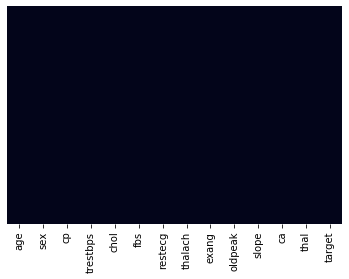

In [9]:
# check for nan values using heatmap
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

### So there is no nan values present in the dataset

In [10]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [11]:
# Let's chk unique values in diagnosis
df.target.unique()

array([1, 0], dtype=int64)

In [12]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [13]:
def summary_table(df):
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    return summary

summary_table(df)

,Name,dtypes,Missing,Uniques
0,age,int64,0,41
1,sex,int64,0,2
2,cp,int64,0,4
3,trestbps,int64,0,49
4,chol,int64,0,152
5,fbs,int64,0,2
6,restecg,int64,0,3
7,thalach,int64,0,91
8,exang,int64,0,2
9,oldpeak,float64,0,40


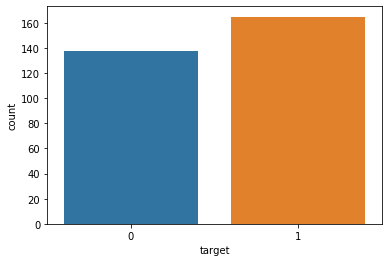

In [14]:
sns.countplot(df['target'])

In [15]:
df.duplicated().sum()

1

The above outputs show that no Data Cleansing is required, only a duplicated entry needs to be deleted. 

In [16]:
#Remove Duplicates
df.drop_duplicates(inplace = True)

In [17]:
df.shape

(302, 14)

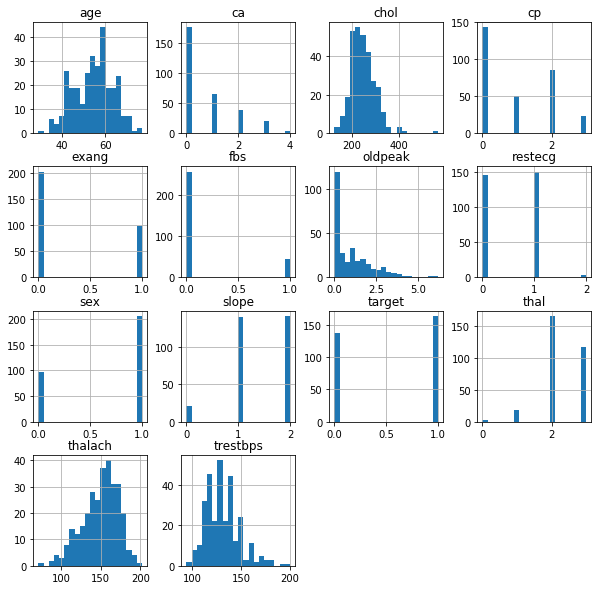

In [18]:
#histogram plot
df.hist(bins=20,figsize=(10,10))
plt.show()

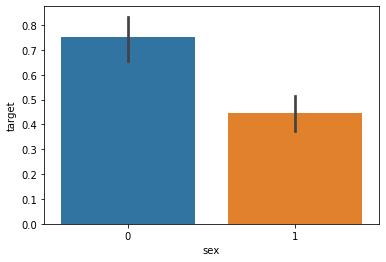

In [19]:
sns.barplot(df['sex'],df['target'])

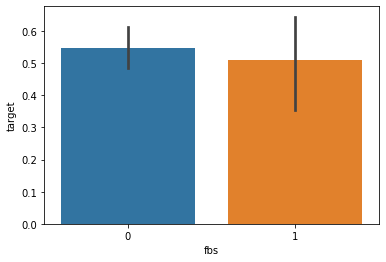

In [20]:
# Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
sns.barplot(x="fbs", y="target", data=df)
plt.show()

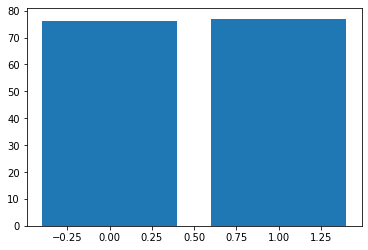

In [21]:
plt.bar(x=df['sex'],height=df['age'])
plt.show()

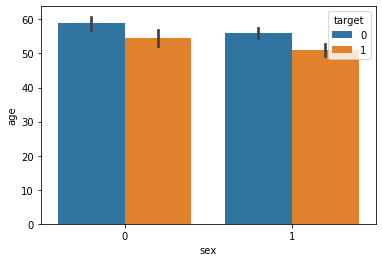

In [22]:
#  to chk in which age male or female person got cancer or not
sns.barplot(x=df['sex'],y=df['age'],hue=df['target'])
plt.show()

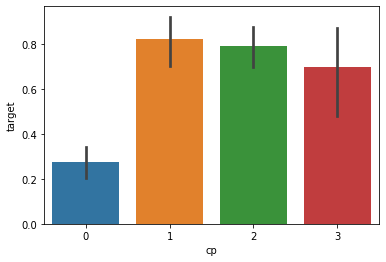

In [23]:
#  chest pain vs targeted value
sns.barplot(df["cp"],df['target'])
plt.show()

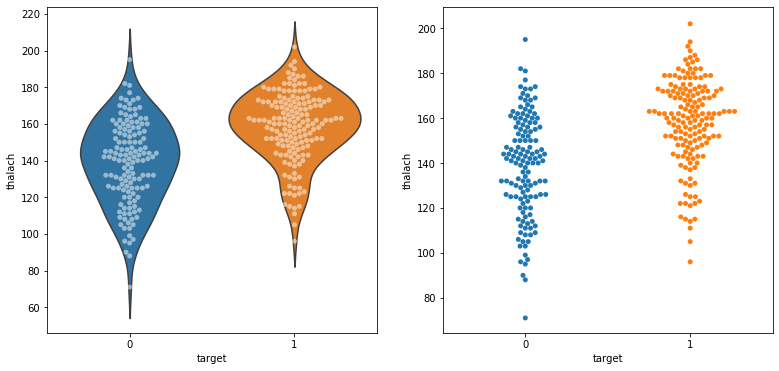

In [24]:
plt.figure(figsize=(13,6))
plt.subplot(121)
sns.violinplot(x="target", y="thalach", data=df, inner=None)
sns.swarmplot(x="target", y="thalach", data=df, color='w', alpha=0.5)


plt.subplot(122)
sns.swarmplot(x="target", y="thalach", data=df)
plt.show()

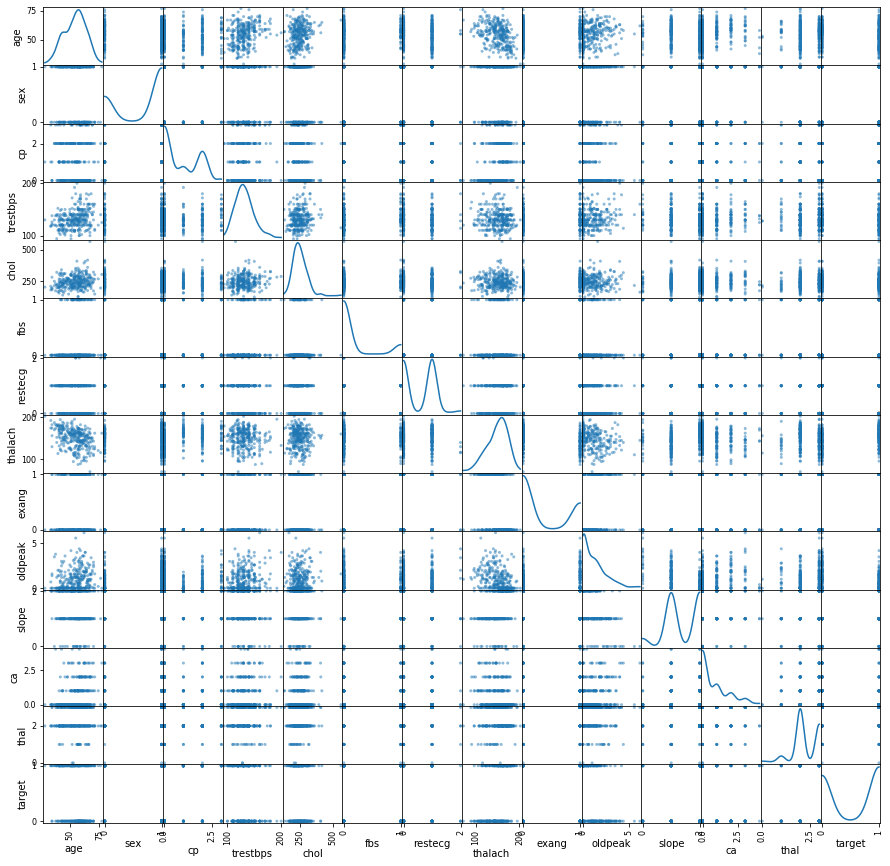

In [25]:
#scatter matrix
pd.plotting.scatter_matrix(df,figsize=(15,15),diagonal ='kde')
plt.show()

- gender or blood sugar, have a majority of samples from one class. As such, there will be an impression that specific situations seem more favourable to a heart attack simply because there is a high number of samples.

- the bar plots below will serve to easily visualise the categories within the features that contain more samples from target 0 or 1, e.g. the discrepancy between the number of samples for positive and negative heart attacks of female subjects

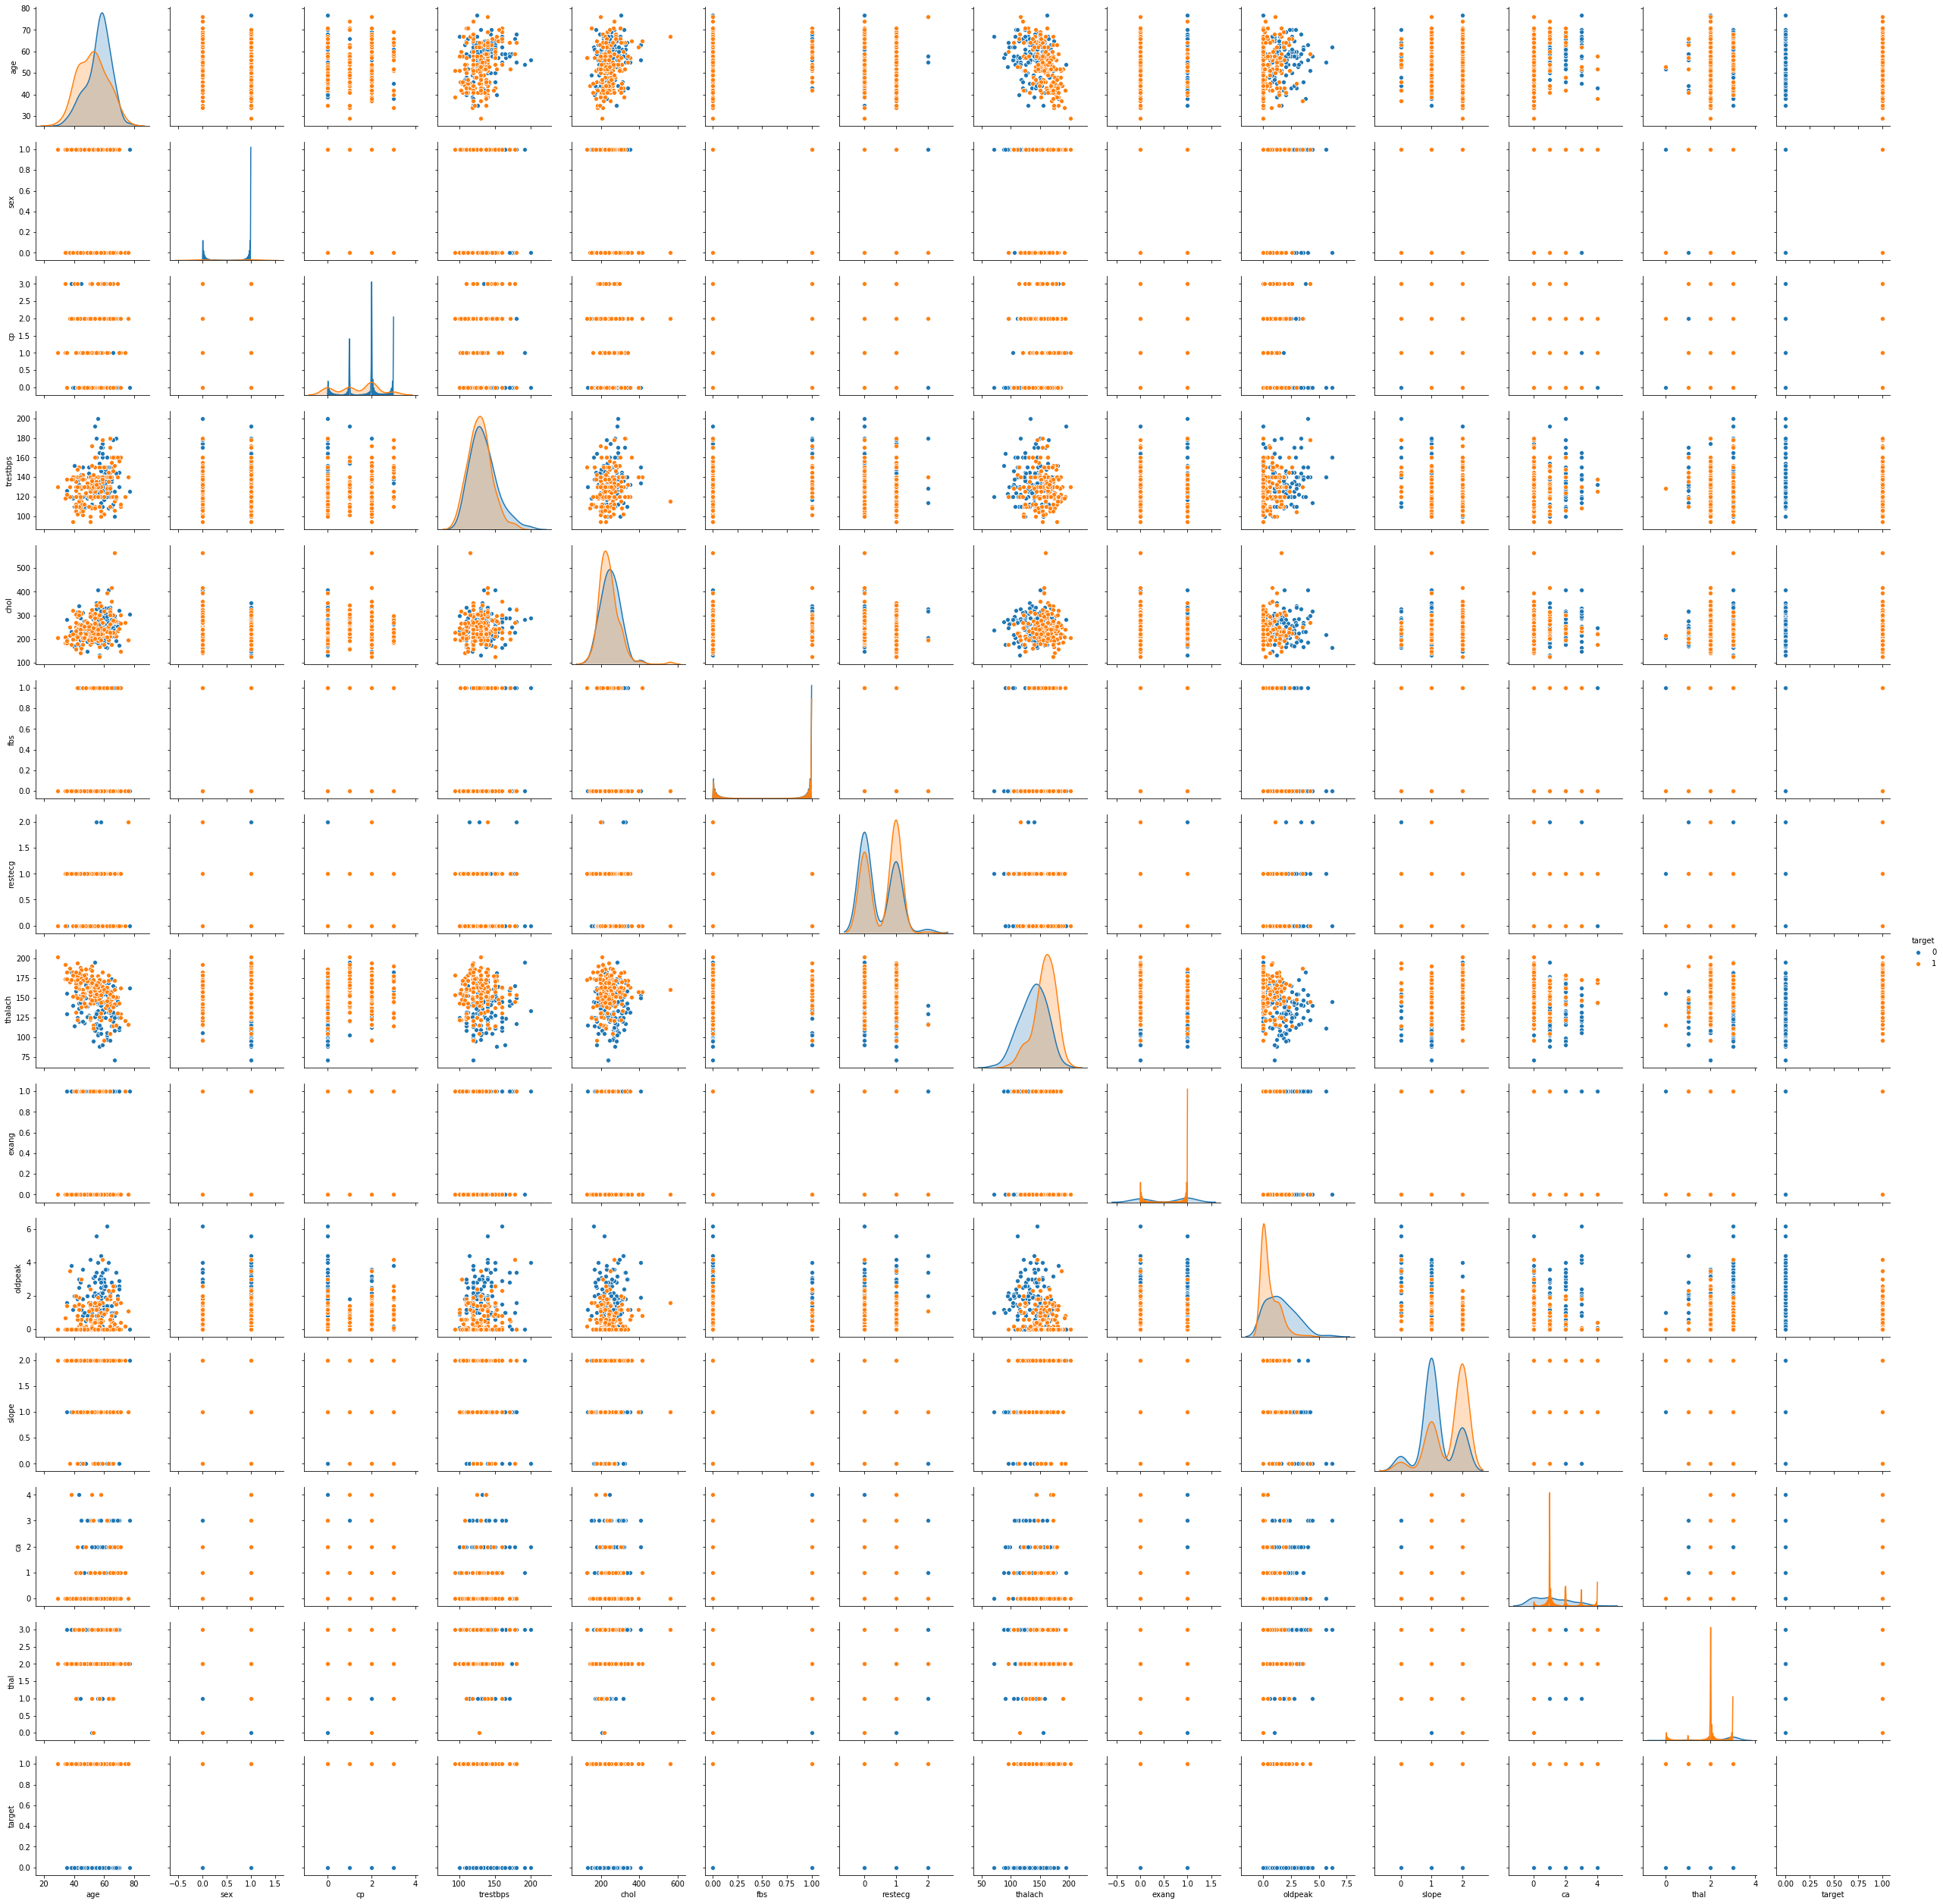

In [26]:
sns.pairplot(df,hue="target")

In [27]:
# displaying te corelation between each column
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


In [28]:
#  for heat map we need only numeric values not binary or etc
numeric_columns=['age','trestbps','chol','thalach','oldpeak']

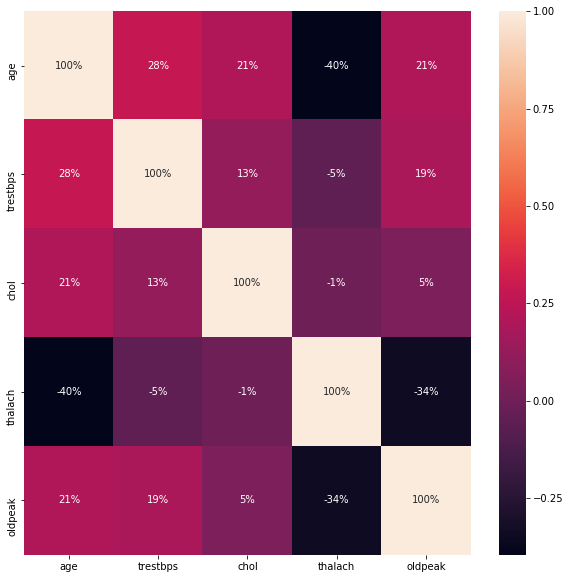

In [29]:
#correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(df[numeric_columns].corr(),annot=True,fmt='.0%')

#In plot we can see there is higher correlation between target and cp (chest pain) ,target and thalach (heart rate)
#some attributes are independent to each other also as there is near 0 correlation

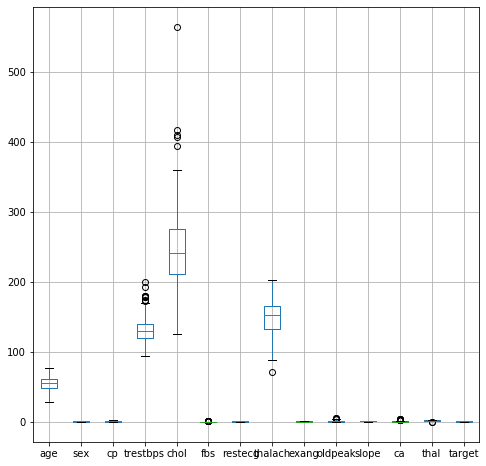

In [30]:
#box plot to see any outlier

df.boxplot(figsize=(8,8))
#we can clearly see our several varibles have outlier which will reduce the performance

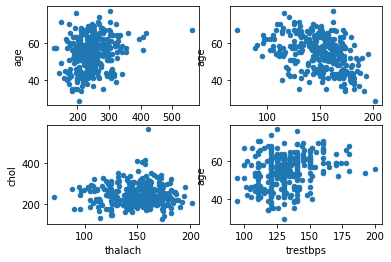

In [31]:
ax=plt.subplot(2,2,1)
df.plot(kind='scatter',y='age',x='chol',ax=ax)
# major of the data are within the 200-300
# We found one outlier the chol is more than 500

ax=plt.subplot(2,2,2)
df.plot(kind='scatter',y='age',x='thalach',ax=ax)

ax=plt.subplot(2,2,3)
df.plot(kind='scatter',y='chol',x='thalach',ax=ax)

ax=plt.subplot(2,2,4)
df.plot(kind='scatter',y='age',x='trestbps',ax=ax)
plt.show()

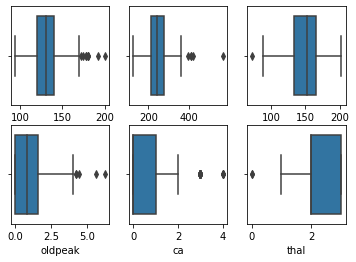

In [32]:
# taking a closer look to each attribute outlier 
ax=plt.subplot(2,3,1)
sns.boxplot(x=df['trestbps'])

ax=plt.subplot(2,3,2)
sns.boxplot(x=df['chol'])

ax=plt.subplot(2,3,3)
sns.boxplot(x=df['thalach'])

ax=plt.subplot(2,3,4)
sns.boxplot(x=df['oldpeak'])

ax=plt.subplot(2,3,5)
sns.boxplot(x=df['ca'])

ax=plt.subplot(2,3,6)
sns.boxplot(x=df['thal'])

plt.show()

In [33]:
#outlier remove process...
#IQR inter quartile range

Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

print((df < (Q1 - 1.5 * IQR))|(df > (Q3 + 1.5 * IQR)))

age         13.00
sex          1.00
cp           2.00
trestbps    20.00
chol        63.75
fbs          0.00
restecg      1.00
thalach     32.75
exang        1.00
oldpeak      1.60
slope        1.00
ca           1.00
thal         1.00
target       1.00
dtype: float64
       age    sex     cp  trestbps   chol    fbs  restecg  thalach  exang  \
0    False  False  False     False  False   True    False    False  False   
1    False  False  False     False  False  False    False    False  False   
2    False  False  False     False  False  False    False    False  False   
3    False  False  False     False  False  False    False    False  False   
4    False  False  False     False  False  False    False    False  False   
5    False  False  False     False  False  False    False    False  False   
6    False  False  False     False  False  False    False    False  False   
7    False  False  False     False  False  False    False    False  False   
8    False  False  False      True  Fals

In [34]:
data_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape,data_out.shape
#more than 80 records deleted

((302, 14), (228, 14))

Age, Gender and Heart Attacks :-


Next, let's analyse any trends between gender, age and the possibility of heart attack. The plot below shows the age of all samples that belong to class 1 (Heart Attack), segmented by gender.

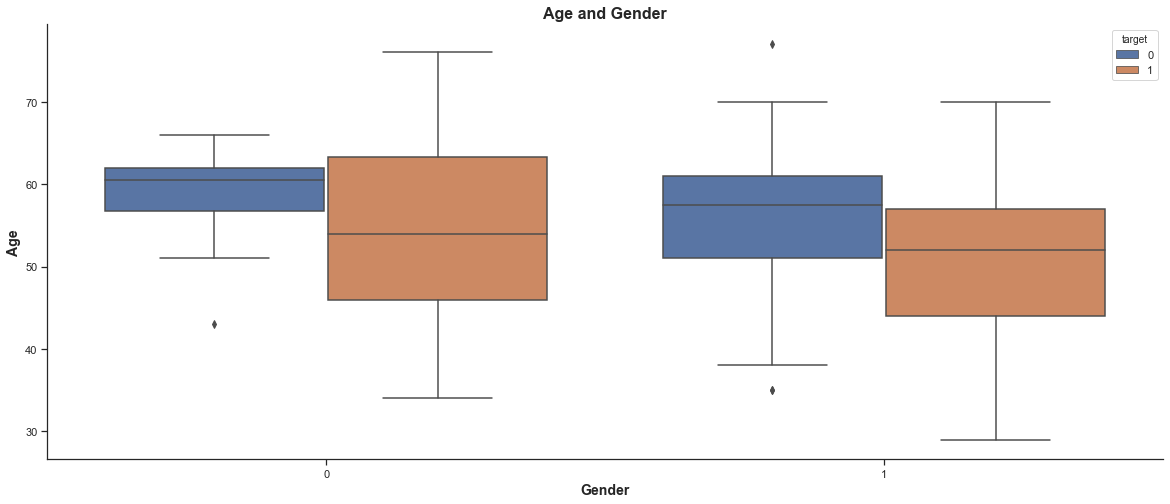

In [35]:
plt.figure(figsize=(20,8))
sns.set(style="ticks", font_scale = 1)
ax = sns.boxplot(x="sex", y="age", data=df, hue = 'target')
sns.despine(top=True, right=True, left=False, bottom=False)
ax.set_xlabel('Gender',fontsize = 14,weight = 'bold')
ax.set_ylabel('Age',fontsize = 14,weight = 'bold')
plt.title('Age and Gender', fontsize = 16,weight = 'bold');

- The mean Age is higher for Females considering both Targets, Yes and No Heart Attack
- The mean age for Males with No Heart Attacks is higher than samples with Heart Attacks, which is unexpected
- The Interquantile Range for No Heart Attacks targets presents a smaller variability if compared to the Yes class. This is valid for both genders
- For positive Heart Attack samples, the median for Male and Females are similar. For Negative samples, Females have a higher median than Males
- Using a bar plot, we can visualise the Age and Gender samples in more detail.

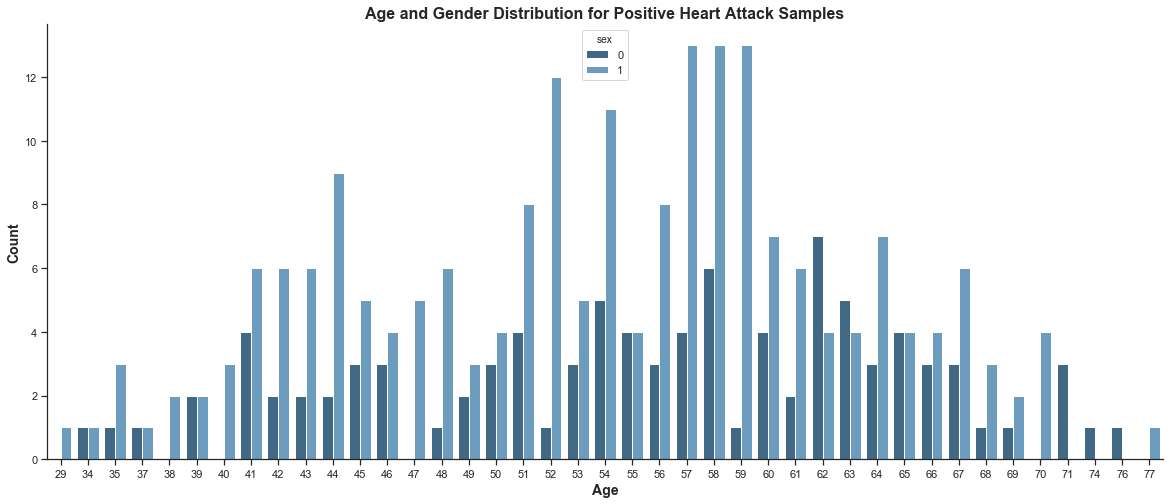

In [36]:
heartTarget = df[df['target']==1]
plt.figure(figsize=(20,8))
sns.set(style="ticks", font_scale = 1)
ax = sns.countplot(data = df,x='age',palette="Blues_d", hue = 'sex')
sns.despine(top=True, right=True, left=False, bottom=False)
ax.set_xlabel('Age',fontsize = 14,weight = 'bold')
ax.set_ylabel('Count',fontsize = 14,weight = 'bold')
plt.title('Age and Gender Distribution for Positive Heart Attack Samples', fontsize = 16,weight = 'bold');

- For male samples, there are clear peaks at age 44, 52 and 57-59 years. For females, the peaks are 54, 58, 62 and 63 year old
- 62 and 63 age groups are the only ages where females had more heart attack than males. It is surprising due to the small number of female samples
- While the distribution of age differ between both genders, most samples of positive heart attack are from patients from the age of 50 and beyond
- The number of heart attack for males almost doubles from 40 to 41 years of age

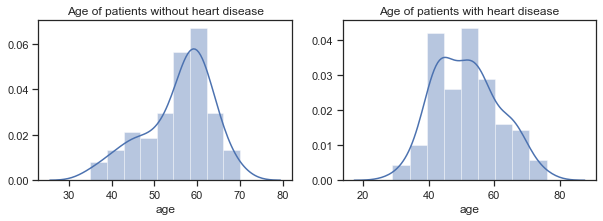

In [37]:
# create four displots/subplots

plt.figure(figsize=(10,10))
plt.subplot(321)
sns.distplot(data_out[data_out['target']==0].age)
plt.title('Age of patients without heart disease')
plt.subplot(322)
sns.distplot(data_out[data_out['target'] == 1].age)
plt.title('Age of patients with heart disease')

plt.show()

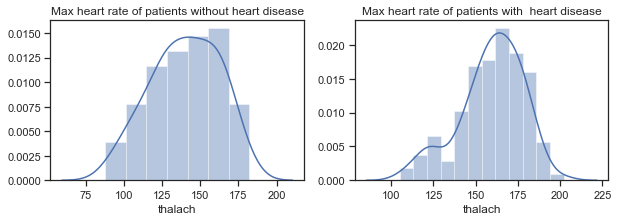

In [38]:
# thlch --> maximum heart rate received
plt.figure(figsize=(10,10))
plt.subplot(321)
sns.distplot(data_out[data_out['target']==0].thalach)
plt.title('Max heart rate of patients without heart disease')
plt.subplot(322)
sns.distplot(data_out[data_out['target']==1].thalach)
plt.title('Max heart rate of patients with  heart disease')

plt.show()

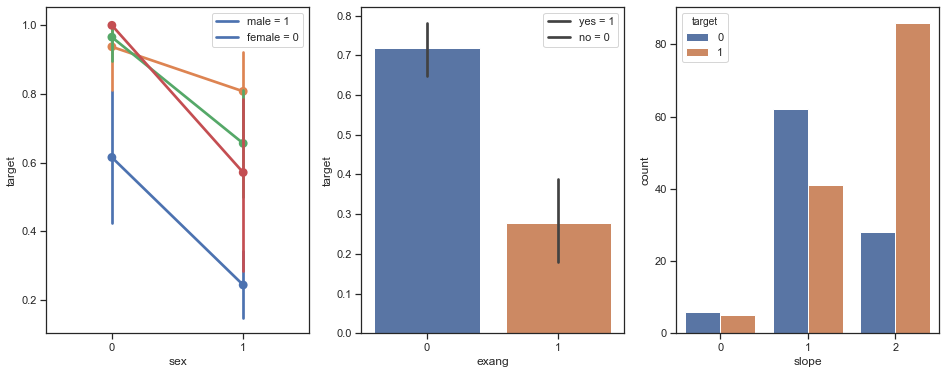

In [39]:
#  Exercise-induced angina  --> exang

# create pairplot and two barplots
plt.figure(figsize=(16,6))
plt.subplot(131)
sns.pointplot(x="sex", y="target", hue='cp', data=data_out)
plt.legend(['male = 1', 'female = 0'])
plt.subplot(132)
sns.barplot(x="exang", y="target", data=data_out)
plt.legend(['yes = 1', 'no = 0'])
plt.subplot(133)
sns.countplot(x="slope", hue='target', data=data_out)
plt.show()

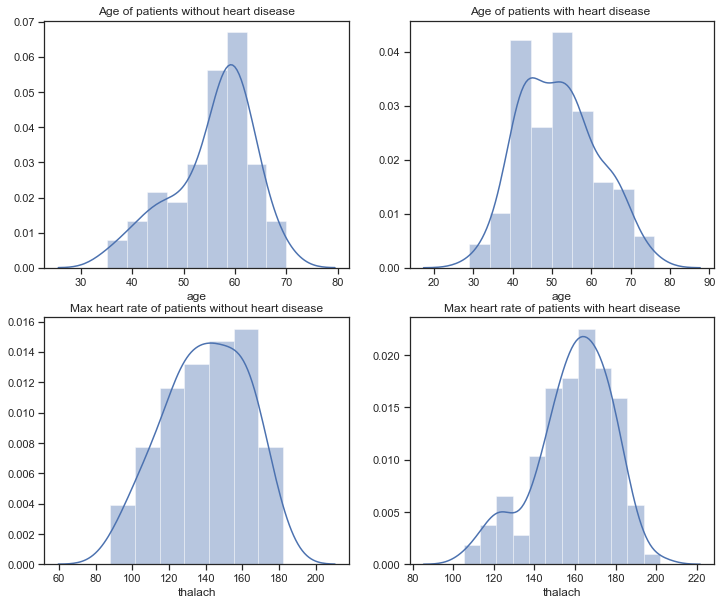

In [40]:
# create four displots/subplots
df= data_out.copy()
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df[df['target']==0].age)
plt.title('Age of patients without heart disease')
plt.subplot(222)
sns.distplot(df[df['target'] == 1].age)
plt.title('Age of patients with heart disease ')
plt.subplot(223)
sns.distplot(df[df['target'] ==0].thalach )
plt.title('Max heart rate of patients without heart disease')
plt.subplot(224)
sns.distplot(df[df['target'] ==1].thalach)
plt.title('Max heart rate of patients with heart disease')
plt.show()

## Step 4 : Splitting into dependant and independant variables

In [41]:
#extract feature and target
X=data_out.drop(columns=['target'])
y=data_out['target']

In [42]:
X.shape,y.shape

((228, 13), (228,))

## Step 5 : Splitting the datasets into 75% traning and 25% testing

In [43]:
#split the dataset into train and test 10%
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.25,random_state=5)



In [44]:
print('The size of x_train :',X_train.shape)
print('The size of x_test :',X_test.shape)
print('The size of y_train :',Y_train.shape)
print('The size of y_test :',Y_test.shape)

The size of x_train : (171, 13)
The size of x_test : (57, 13)
The size of y_train : (171,)
The size of y_test : (57,)


## Step 6 : Feature Scaling


In [45]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

# Scale the data to bring all features to the same level of magnitude, 
# which means the feature / independent data will be within a specific range for example 0–100 or 0–1.

In [46]:
print(X_train)

print('---------------')
print(X_test)

[[-0.03634182  0.71643167 -0.94316849 ...  0.94692793 -0.65712874
   1.23623437]
 [-2.6996782   0.71643167  0.05239825 ...  0.94692793 -0.65712874
  -0.54020325]
 [ 0.18560288  0.71643167 -0.94316849 ... -0.73978745  0.82141093
   1.23623437]
 ...
 [ 0.29657522  0.71643167 -0.94316849 ... -0.73978745  0.82141093
  -2.31664088]
 [-0.70217592  0.71643167 -0.94316849 ... -0.73978745  0.82141093
  -0.54020325]
 [ 1.51727106 -1.39580653  1.04796499 ...  0.94692793  0.82141093
  -0.54020325]]
---------------
[[ 0.74046462  0.71643167 -0.94316849  0.05904539 -0.830311    0.
  -1.08117981 -0.83561227  1.49211765  1.41513262 -0.73978745  2.29995059
   1.23623437]
 [ 0.07463053 -1.39580653  1.04796499 -1.32063627  0.5858064   0.
  -1.08117981  0.74853073 -0.67018844 -0.90887869  0.94692793 -0.65712874
  -0.54020325]
 [-0.14731417  0.71643167  0.05239825 -0.56808264  1.93227868  0.
   0.84467172  0.97483687 -0.67018844 -0.71521108  0.94692793 -0.65712874
  -0.54020325]
 [-2.0338441  -1.39580653 -

## Step 7 : Model Selection

### Train the model

In [47]:
def models(X_train,Y_train):
    
  
  #Using Logistic Regression 
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)
  
  
  #Using KNeighborsClassifier 
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  #Using SVC linear
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state = 0)
  svc_lin.fit(X_train, Y_train)

  #Using SVC rbf
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train, Y_train)

  #Using GaussianNB 
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, Y_train)

  #Using DecisionTreeClassifier 
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)
  

  algos=['Logistic Regression','K Nearest Neighbor','SVM(Linear Classifier)',
         'SVM(RBF Classifier)','Naive Bayes','Decision Tree','Random Forest'] 
  
  accuracy = [log.score(X_train, Y_train),knn.score(X_train, Y_train),
              svc_lin.score(X_train, Y_train),svc_rbf.score(X_train, Y_train),
              gauss.score(X_train, Y_train),tree.score(X_train, Y_train),forest.score(X_train, Y_train)]
    
  
  
  for i in range(7):
      print([i],'{} Training Accuracy: {} %'.format(algos[i],round((accuracy[i])*100,2)))
  
  print("")
  print("Plotting accuracy Barplot......")
  color=['green','#0FBBAE','purple','red','orange','magenta','cyan']
  sns.set_style('whitegrid')
  plt.figure(figsize=(15,6)) #size of the graph
  plt.ylabel('Accuracy(%)')
  plt.title("Algorithm prediction")
  plt.xlabel('Algorithms')
  sns.barplot(x=algos,y=accuracy,palette=color)  
  plt.show()
  
    
  # using zip() to convert lists to dictionary
  training_acc = dict(zip(algos, accuracy))
  

  max_key = max(training_acc, key=training_acc.get)
  max_value = max(training_acc.values())

  print('The maximum training accuracy is given by {} model at {} %'.format(max_key,round(max_value,2)*100))

  return log, knn, svc_lin, svc_rbf, gauss, tree, forest

[0] Logistic Regression Training Accuracy: 86.55 %
[1] K Nearest Neighbor Training Accuracy: 85.38 %
[2] SVM(Linear Classifier) Training Accuracy: 85.96 %
[3] SVM(RBF Classifier) Training Accuracy: 92.4 %
[4] Naive Bayes Training Accuracy: 84.21 %
[5] Decision Tree Training Accuracy: 100.0 %
[6] Random Forest Training Accuracy: 99.42 %

Plotting accuracy Barplot......


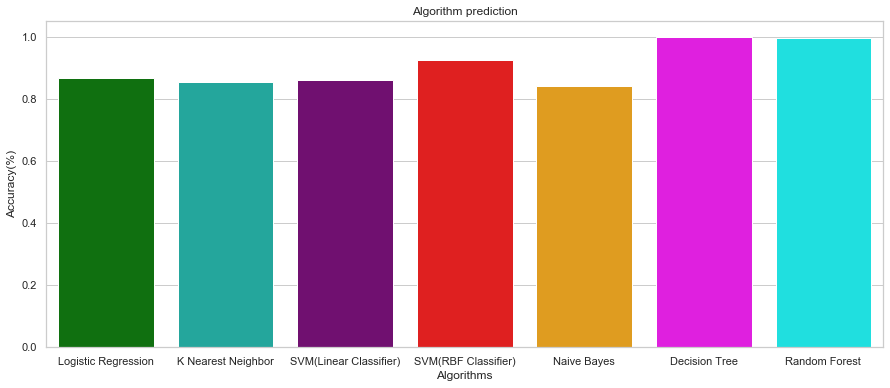

The maximum training accuracy is given by Decision Tree model at 100.0 %


In [48]:
model = models(X_train,Y_train)

In [49]:
model


(LogisticRegression(random_state=0),
 KNeighborsClassifier(),
 SVC(kernel='linear', random_state=0),
 SVC(random_state=0),
 GaussianNB(),
 DecisionTreeClassifier(criterion='entropy', random_state=0),
 RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0))

### Test the model

In [50]:
model_name=['Logistic Regression','K Nearest Neighbor','SVM(Linear Classifier)',
         'SVM(RBF Classifier)','Naive Bayes','Decision Tree','Random Forest']

In [51]:
# test model accuracy on test data on confusion matrix

from sklearn.metrics import confusion_matrix
cMatrix=[]
for i in range(len(model)):
  cm = confusion_matrix(Y_test, model[i].predict(X_test))
  cMatrix.append(cm)
  TN = cm[0][0]
  TP = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]
  
  print(cm)
  print("")
  print('Model[{}] {} Testing Accuracy = {} %'.format(i, model_name[i], round((TP + TN) / (TP + TN + FN + FP)*100 ,2)))
  
  print('------------')

[[21  2]
 [ 4 30]]

Model[0] Logistic Regression Testing Accuracy = 89.47 %
------------
[[21  2]
 [ 5 29]]

Model[1] K Nearest Neighbor Testing Accuracy = 87.72 %
------------
[[21  2]
 [ 6 28]]

Model[2] SVM(Linear Classifier) Testing Accuracy = 85.96 %
------------
[[21  2]
 [ 6 28]]

Model[3] SVM(RBF Classifier) Testing Accuracy = 85.96 %
------------
[[21  2]
 [ 3 31]]

Model[4] Naive Bayes Testing Accuracy = 91.23 %
------------
[[22  1]
 [ 4 30]]

Model[5] Decision Tree Testing Accuracy = 91.23 %
------------
[[20  3]
 [ 4 30]]

Model[6] Random Forest Testing Accuracy = 87.72 %
------------


In [52]:
#Show other ways to get the classification accuracy & other metrics 

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,roc_auc_score
pred_lis=[]
for i in range(len(model)):
  print(f'Model {[i]} : {model_name[i]}')
  #Check precision, recall, f1-score
  print( classification_report(Y_test, model[i].predict(X_test)) )
  #Another way to get the models accuracy on the test data
  pred_lis.append(accuracy_score(Y_test, model[i].predict(X_test))*100)
  print( "Accuracy is: {} %".format(pred_lis[i]))
  print( "ROC AUC score is: {} %".format(roc_auc_score(Y_test, model[i].predict(X_test))*100))

  print('---------------------')

Model [0] : Logistic Regression
              precision    recall  f1-score   support

           0       0.84      0.91      0.87        23
           1       0.94      0.88      0.91        34

    accuracy                           0.89        57
   macro avg       0.89      0.90      0.89        57
weighted avg       0.90      0.89      0.90        57

Accuracy is: 89.47368421052632 %
ROC AUC score is: 89.769820971867 %
---------------------
Model [1] : K Nearest Neighbor
              precision    recall  f1-score   support

           0       0.81      0.91      0.86        23
           1       0.94      0.85      0.89        34

    accuracy                           0.88        57
   macro avg       0.87      0.88      0.87        57
weighted avg       0.88      0.88      0.88        57

Accuracy is: 87.71929824561403 %
ROC AUC score is: 88.29923273657289 %
---------------------
Model [2] : SVM(Linear Classifier)
              precision    recall  f1-score   support

         

In [53]:
    
data=list(zip(model_name,pred_lis))
result=pd.DataFrame(data,columns=['Model','Accuracy']).sort_values(["Accuracy"], ascending = False)
result

,Model,Accuracy
4,Naive Bayes,91.228070
5,Decision Tree,91.228070
0,Logistic Regression,89.473684
1,K Nearest Neighbor,87.719298
6,Random Forest,87.719298
2,SVM(Linear Classifier),85.964912
3,SVM(RBF Classifier),85.964912


In [54]:
maxAcc = dict(zip(model_name,pred_lis))
max_key = max(maxAcc, key=maxAcc.get)
max_value = max(maxAcc.values())

print('The maximum  accuracy is given by {} model at {} %'.format(max_key,max_value))
print()
print(f'So we are going to choose {max_key} model for our project')


The maximum  accuracy is given by Naive Bayes model at 91.22807017543859 %

So we are going to choose Naive Bayes model for our project


accuracy comparison:-


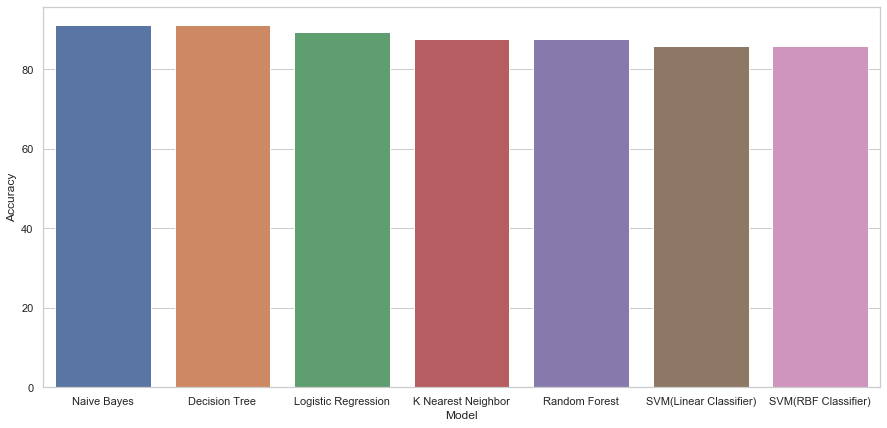

In [55]:
print("accuracy comparison:-")
plt.figure(figsize=(15,7))
sns.barplot(x = "Model", y = "Accuracy", data = result)
plt.show()

In [56]:
ind = list(dict(data).keys()).index(max_key)
ind

4

confusion matrix for Naive Bayes plotted below :-


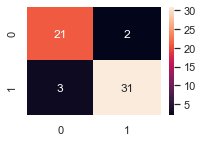

In [57]:
print(f'confusion matrix for {max_key} plotted below :-')

plt.figure(figsize=(3,2))
ax = sns.heatmap(cMatrix[ind], annot=True, fmt="d")
plt.show()

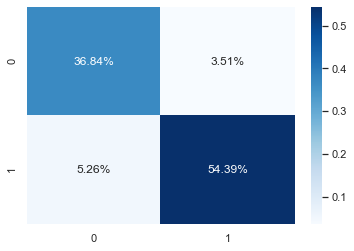

In [58]:
sns.heatmap(cMatrix[ind]/np.sum(cMatrix[ind]), annot=True, 
            fmt='.2%', cmap='Blues')

In [59]:
#Print Prediction of SVM model
pred = model[ind].predict(X_test)

print(pred)
print(pred.shape)

print('---------')

#Print the actual values
print(np.array(Y_test))


[0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0
 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1]
(57,)
---------
[0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0
 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1]


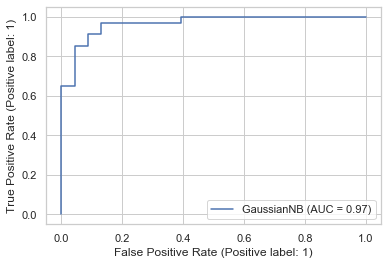

In [60]:
from sklearn import metrics
metrics.plot_roc_curve(model[ind], X_test, Y_test)  
plt.show() 

In [61]:
myFinalmodel = model[ind]
myFinalmodel

GaussianNB()

## Model export in pickle file for used as backend with django

In [62]:
pd.to_pickle(myFinalmodel,r'C:\Users\msahi\OneDrive\Desktop\Diseae Prediction\models\heart-attack-gaussianNB.pickle')